# **Data Profiling Notebook - NYC Collisions Dataset**
### **Import libraries, create output folders and read the dataset**

In [8]:
import os

import pandas as pd
from numpy import log
from pandas import Series
from scipy.stats import norm, expon, lognorm
from sklearn.preprocessing import LabelEncoder
from seaborn import distplot, heatmap
from matplotlib.pyplot import figure, savefig, show, subplots, Axes, title
from datetime import datetime
from utils.ds_charts import bar_chart, get_variable_types, choose_grid, multiple_bar_chart, multiple_line_chart, HEIGHT

DATA_FILE = "data/original_tabular.csv"
IMAGES_FOLDER = "images/"
DIMENSIONALITY_FOLDER = IMAGES_FOLDER + "dimensionality/"
DISTRIBUTION_FOLDER = IMAGES_FOLDER + "distribution/"
GRANULARITY_FOLDER = IMAGES_FOLDER + "granularity/"
SPARCITY_FOLDER = IMAGES_FOLDER + "sparcity/"

if not os.path.exists(DIMENSIONALITY_FOLDER):
    os.makedirs(DIMENSIONALITY_FOLDER)
if not os.path.exists(DISTRIBUTION_FOLDER):
    os.makedirs(DISTRIBUTION_FOLDER)
if not os.path.exists(GRANULARITY_FOLDER):
    os.makedirs(GRANULARITY_FOLDER)
if not os.path.exists(SPARCITY_FOLDER):
    os.makedirs(SPARCITY_FOLDER)

df = pd.read_csv(DATA_FILE, parse_dates=[["CRASH_DATE", "CRASH_TIME"]])
df.rename(columns={'CRASH_DATE_CRASH_TIME': 'CRASH_DATETIME'}, inplace=True)

### **Remove unnecessary ID columns**

In [9]:
df.drop(['VEHICLE_ID','PERSON_ID','UNIQUE_ID','COLLISION_ID'], axis=1, inplace=True)
df

CRASH_DATETIME  PERSON_AGE         BODILY_INJURY  \
0     2021-01-01 00:00:00        37.0                  Neck   
1     2021-01-01 00:00:00        22.0  Shoulder - Upper Arm   
2     2021-01-01 00:00:00        43.0  Elbow-Lower-Arm-Hand   
3     2021-01-01 00:00:00        68.0                  Neck   
4     2021-01-01 00:00:00        22.0                  Neck   
...                   ...         ...                   ...   
45664 2021-11-16 21:00:00        28.0   Knee-Lower Leg Foot   
45665 2021-11-16 22:00:00        25.0                  Head   
45666 2021-11-16 22:00:00        30.0   Knee-Lower Leg Foot   
45667 2021-11-16 22:00:00        62.0                  Neck   
45668 2021-11-16 22:00:00        18.0         Hip-Upper Leg   

               SAFETY_EQUIPMENT PERSON_SEX      PERSON_TYPE  \
0            Lap Belt & Harness          M         Occupant   
1            Lap Belt & Harness          M         Occupant   
2                           NaN          M       Pedestrian   
3            Lap Belt & Harness          F         Occupant   
4            Lap Belt & Harness          M         Occupant   
...                         ...        ...              ...   
45664                  Lap Belt          F         Occupant   
45665                   Unknown          M  Other Motorized   
45666        Lap Belt & Harness          F         Occupant   
45667        Lap Belt & Harness          M         Occupant   
45668  Helmet (Motorcycle Only)          M        Bicyclist   

                                            PED_LOCATION  \
0                                                    NaN   
1                                                    NaN   
2      Pedestrian/Bicyclist/Other Pedestrian at Inter...   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
45664                                                NaN   
45665                                                NaN   
45666                                                NaN   
45667                                                NaN   
45668                                                NaN   

      CONTRIBUTING_FACTOR_2     EJECTION                    COMPLAINT  \
0                       NaN  Not Ejected  Complaint of Pain or Nausea   
1                       NaN  Not Ejected  Complaint of Pain or Nausea   
2               Unspecified          NaN               Minor Bleeding   
3                       NaN  Not Ejected  Complaint of Pain or Nausea   
4                       NaN  Not Ejected  Complaint of Pain or Nausea   
...                     ...          ...                          ...   
45664                   NaN  Not Ejected                      Unknown   
45665                   NaN      Ejected                   Concussion   
45666                   NaN  Not Ejected                     Internal   
45667                   NaN  Not Ejected  Complaint of Pain or Nausea   
45668                   NaN      Ejected  Complaint of Pain or Nausea   

      EMOTIONAL_STATUS CONTRIBUTING_FACTOR_1  \
0            Conscious                   NaN   
1            Conscious                   NaN   
2            Conscious           Unspecified   
3            Conscious                   NaN   
4            Conscious                   NaN   
...                ...                   ...   
45664        Conscious                   NaN   
45665        Conscious                   NaN   
45666        Conscious                   NaN   
45667        Conscious                   NaN   
45668        Conscious                   NaN   

                                     POSITION_IN_VEHICLE    PED_ROLE  \
0                                                 Driver      Driver   
1                                                 Driver      Driver   
2                                                    NaN  Pedestrian   
3      Front passenger, if two or 

## **Data Dimensionality**

### Number of records versus number of variables

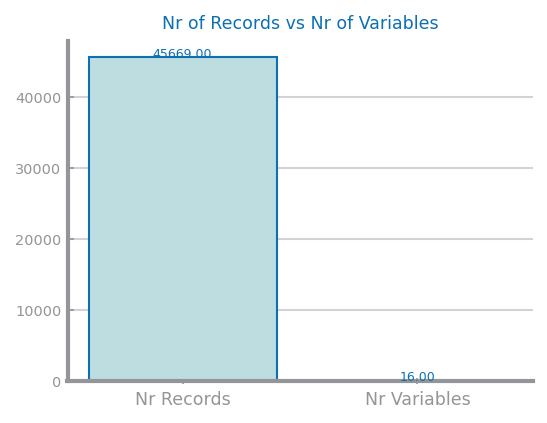

In [10]:
values = {'Nr Records': df.shape[0], 'Nr Variables': df.shape[1]}
bar_chart(list(values.keys()), list(values.values()), title='Nr of Records vs Nr of Variables')

savefig(DIMENSIONALITY_FOLDER + '/records_vs_variables.png')

show()

### Initial category of each feature

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45669 entries, 0 to 45668
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CRASH_DATETIME         45669 non-null  datetime64[ns]
 1   PERSON_AGE             45248 non-null  float64       
 2   BODILY_INJURY          45669 non-null  object        
 3   SAFETY_EQUIPMENT       39434 non-null  object        
 4   PERSON_SEX             45669 non-null  object        
 5   PERSON_TYPE            45669 non-null  object        
 6   PED_LOCATION           6571 non-null   object        
 7   CONTRIBUTING_FACTOR_2  6546 non-null   object        
 8   EJECTION               39429 non-null  object        
 9   COMPLAINT              45669 non-null  object        
 10  EMOTIONAL_STATUS       45669 non-null  object        
 11  CONTRIBUTING_FACTOR_1  6558 non-null   object        
 12  POSITION_IN_VEHICLE    39448 non-null  object        
 13  P

### Normalized category of each feature

In [12]:
cat_vars = df.select_dtypes(include='object')
df[cat_vars.columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45669 entries, 0 to 45668
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CRASH_DATETIME         45669 non-null  datetime64[ns]
 1   PERSON_AGE             45248 non-null  float64       
 2   BODILY_INJURY          45669 non-null  category      
 3   SAFETY_EQUIPMENT       39434 non-null  category      
 4   PERSON_SEX             45669 non-null  category      
 5   PERSON_TYPE            45669 non-null  category      
 6   PED_LOCATION           6571 non-null   category      
 7   CONTRIBUTING_FACTOR_2  6546 non-null   category      
 8   EJECTION               39429 non-null  category      
 9   COMPLAINT              45669 non-null  category      
 10  EMOTIONAL_STATUS       45669 non-null  category      
 11  CONTRIBUTING_FACTOR_1  6558 non-null   category      
 12  POSITION_IN_VEHICLE    39448 non-null  category      
 13  P

### Number of variables for each category

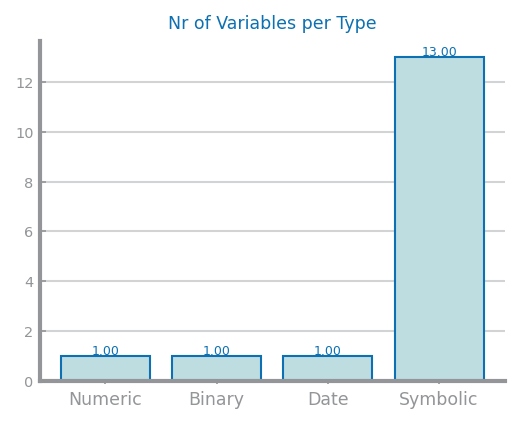

In [13]:
variable_types = get_variable_types(df)

counts = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])
bar_chart(list(counts.keys()), list(counts.values()), title='Nr of Variables per Type')

savefig(DIMENSIONALITY_FOLDER + '/variable_per_types.png')

show()

### Number of missing values for each feature (only those with missing values are included)

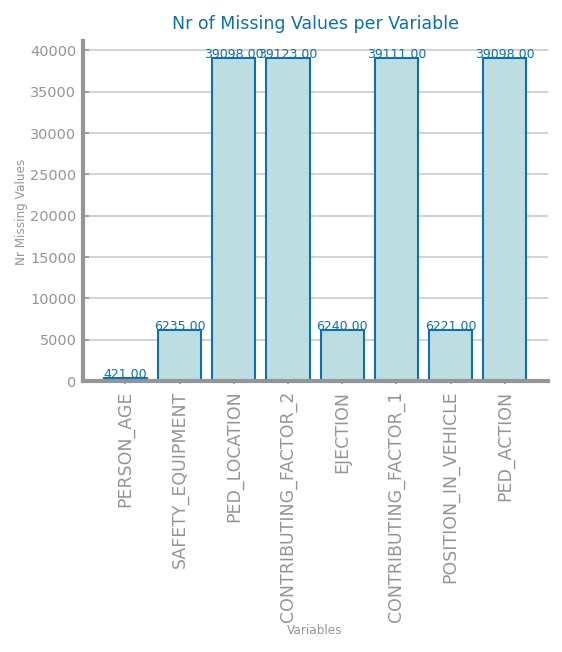

In [14]:
mv = {}
for var in df:
    nr = df[var].isna().sum()
    if nr > 0:
        mv[var] = nr
bar_chart(list(mv.keys()), list(mv.values()), title='Nr of Missing Values per Variable',
            xlabel='Variables', ylabel='Nr Missing Values', rotation=True)

savefig(DIMENSIONALITY_FOLDER + '/missing_values_per_var.png')

show()

### Number of unique values for each feature

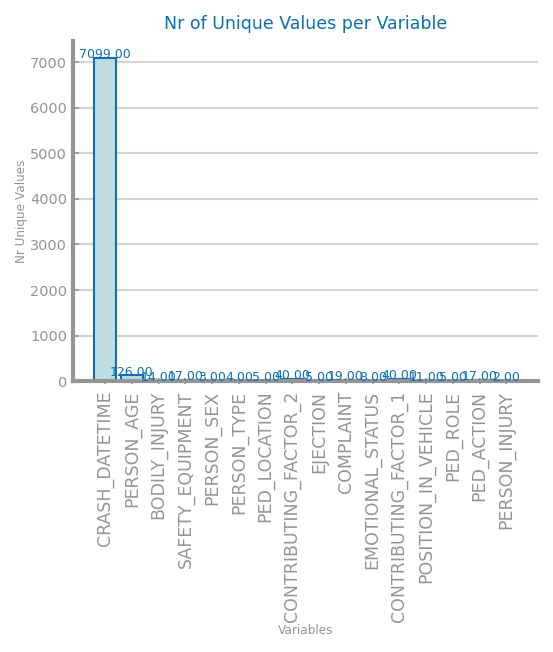

In [15]:
mv = {}
for var in df:
    nr = len(df[var].unique())
    if nr > 0:
        mv[var] = nr
bar_chart(list(mv.keys()), list(mv.values()), title='Nr of Unique Values per Variable',
            xlabel='Variables', ylabel='Nr Unique Values', rotation=True)

savefig(DIMENSIONALITY_FOLDER + '/unique_values_per_var.png')

show()

## **Data Distribution**

### Numeric variables summary

In [17]:
df.describe()

PERSON_AGE
count  45248.000000
mean      37.487646
std       81.492032
min     -971.000000
25%       25.000000
50%       34.000000
75%       48.000000
max     9999.000000

### Global numeric variable distribution boxplot

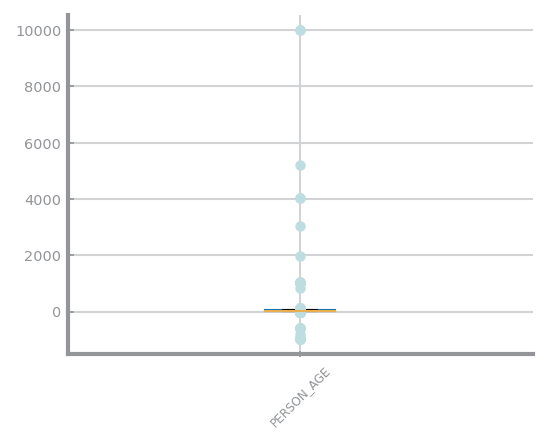

In [18]:
df.boxplot(rot=45)

savefig(DISTRIBUTION_FOLDER + "/global_var_boxplot.png")

show()

### Single numeric variable distribution boxplot

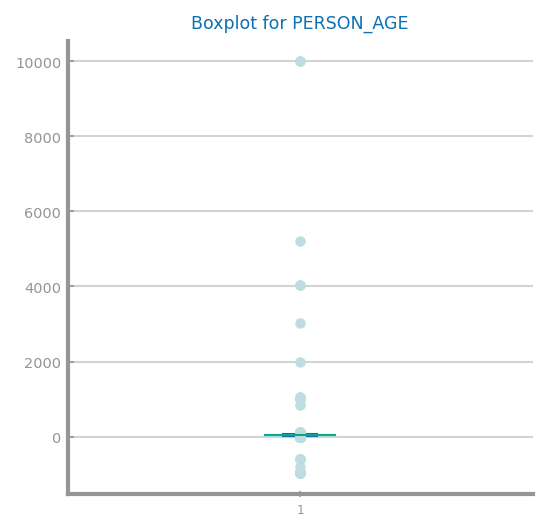

In [19]:
numeric_vars = get_variable_types(df)['Numeric']
if not numeric_vars:
    raise ValueError('There are no numeric variables.')
rows, cols = choose_grid(len(numeric_vars))
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(df[numeric_vars[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

savefig(DISTRIBUTION_FOLDER + "/single_var_boxplots.png")

show()

### Number of outliers per variable using the IQR process and the STD process

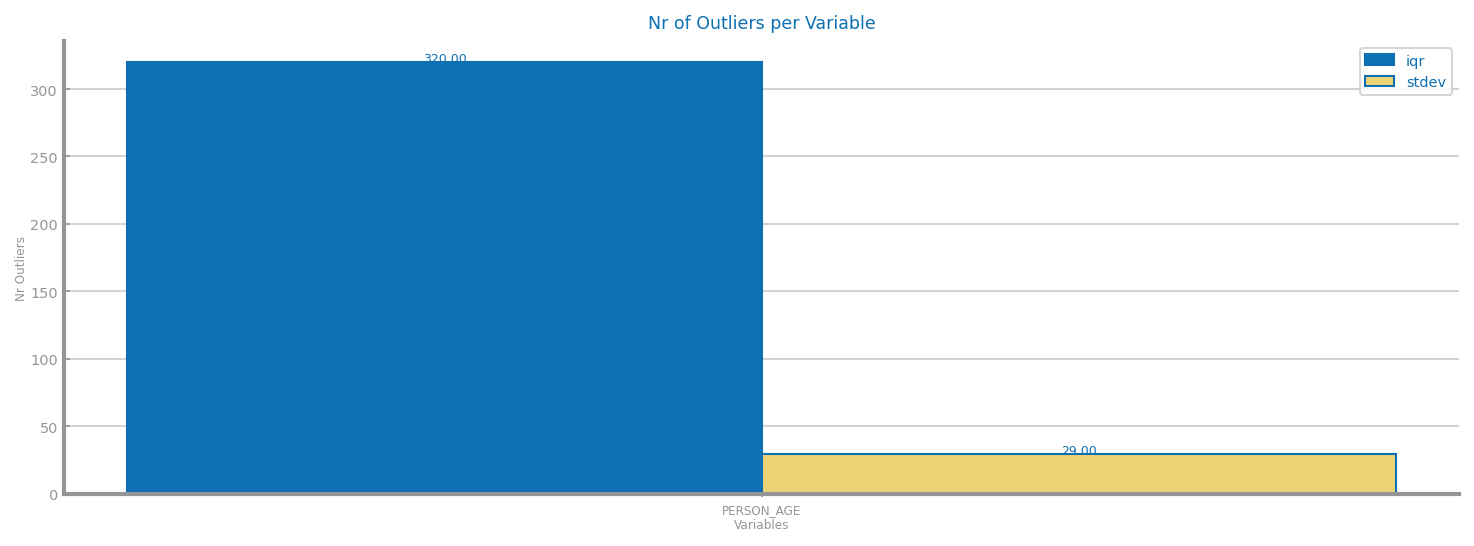

In [20]:
NR_STDDEV: int = 2
numeric_vars = get_variable_types(df)['Numeric']
if not numeric_vars:
    raise ValueError('There are no numeric variables.')
outliers_iqr = []
outliers_stdev = []
summary5 = df.describe(include='number')
for var in numeric_vars:
    iqr = 1.5 * (summary5[var]['75%'] - summary5[var]['25%'])
    outliers_iqr += [
        df[df[var] > summary5[var]['75%']  + iqr].count()[var] +
        df[df[var] < summary5[var]['25%']  - iqr].count()[var]]
    std = NR_STDDEV * summary5[var]['std']
    outliers_stdev += [
        df[df[var] > summary5[var]['mean'] + std].count()[var] +
        df[df[var] < summary5[var]['mean'] - std].count()[var]]
outliers = {'iqr': outliers_iqr, 'stdev': outliers_stdev}
figure(figsize=(12, HEIGHT))
multiple_bar_chart(numeric_vars, outliers, title='Nr of Outliers per Variable', xlabel='Variables', ylabel='Nr Outliers', percentage=False)

savefig(DISTRIBUTION_FOLDER + "/outliers_per_variable.png")

show()

### Basic variable distribution

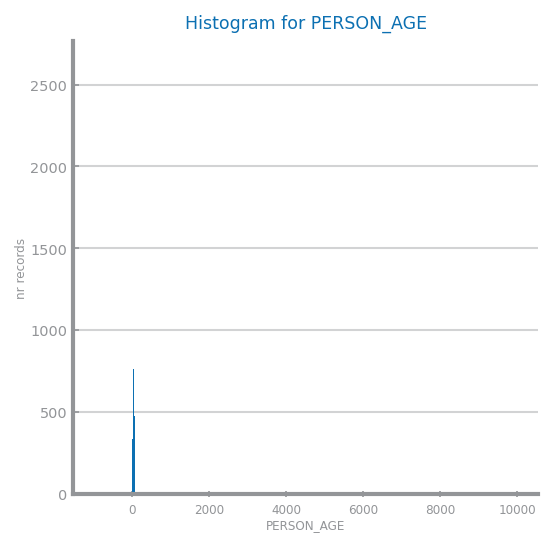

In [21]:
numeric_vars = get_variable_types(df)['Numeric']
if not numeric_vars:
    raise ValueError('There are no numeric variables.')
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Histogram for %s'%numeric_vars[n])
    axs[i, j].set_xlabel(numeric_vars[n])
    axs[i, j].set_ylabel("nr records")
    axs[i, j].hist(df[numeric_vars[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

savefig(DISTRIBUTION_FOLDER + "/numeric_distribution_histogram.png")

show()

### Advanced variable distribution

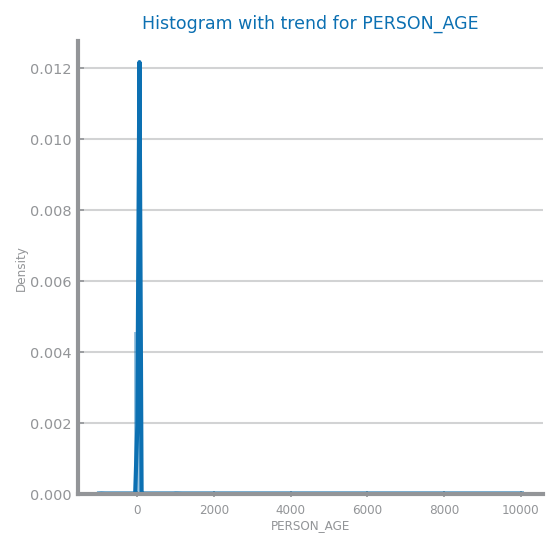

In [22]:
numeric_vars = get_variable_types(df)['Numeric']
if not numeric_vars:
    raise ValueError('There are no numeric variables.')
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Histogram with trend for %s'%numeric_vars[n])
    distplot(df[numeric_vars[n]].dropna().values, norm_hist=True, ax=axs[i, j], axlabel=numeric_vars[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

savefig(DISTRIBUTION_FOLDER + "/numeric_distribution_histogram_trend.png")

show()

### Normal, exponential and logarithmic distributions

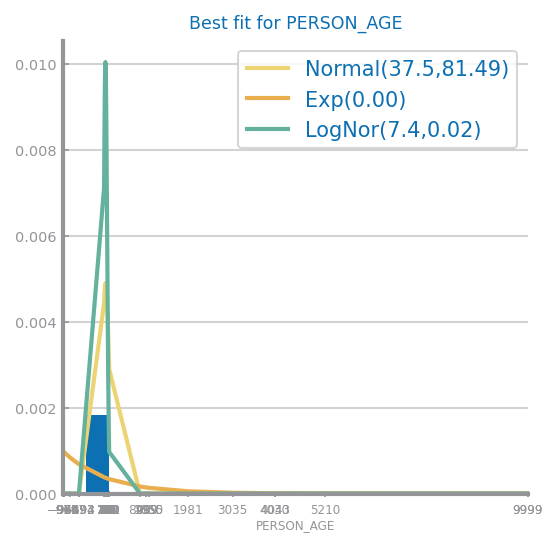

In [23]:
def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = expon.pdf(x_values, loc, scale)
    # LogNorm
    sigma, loc, scale = lognorm.fit(x_values)
    distributions['LogNor(%.1f,%.2f)'%(log(scale),sigma)] = lognorm.pdf(x_values, sigma, loc, scale)
    return distributions

def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values = series.sort_values().values
    ax.hist(values, 20, density=True)
    distributions = compute_known_distributions(values)
    multiple_line_chart(values, distributions, ax=ax, title='Best fit for %s'%var, xlabel=var, ylabel='')

numeric_vars = get_variable_types(df)['Numeric']

rows, cols = choose_grid(len(numeric_vars))

if not numeric_vars:
    raise ValueError('There are no numeric variables.')
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(numeric_vars)):
    histogram_with_distributions(axs[i, j], df[numeric_vars[n]].dropna(), numeric_vars[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

savefig(DISTRIBUTION_FOLDER + "/numeric_normal_exp_log_distribution.png")

show()

### Symbolic variables

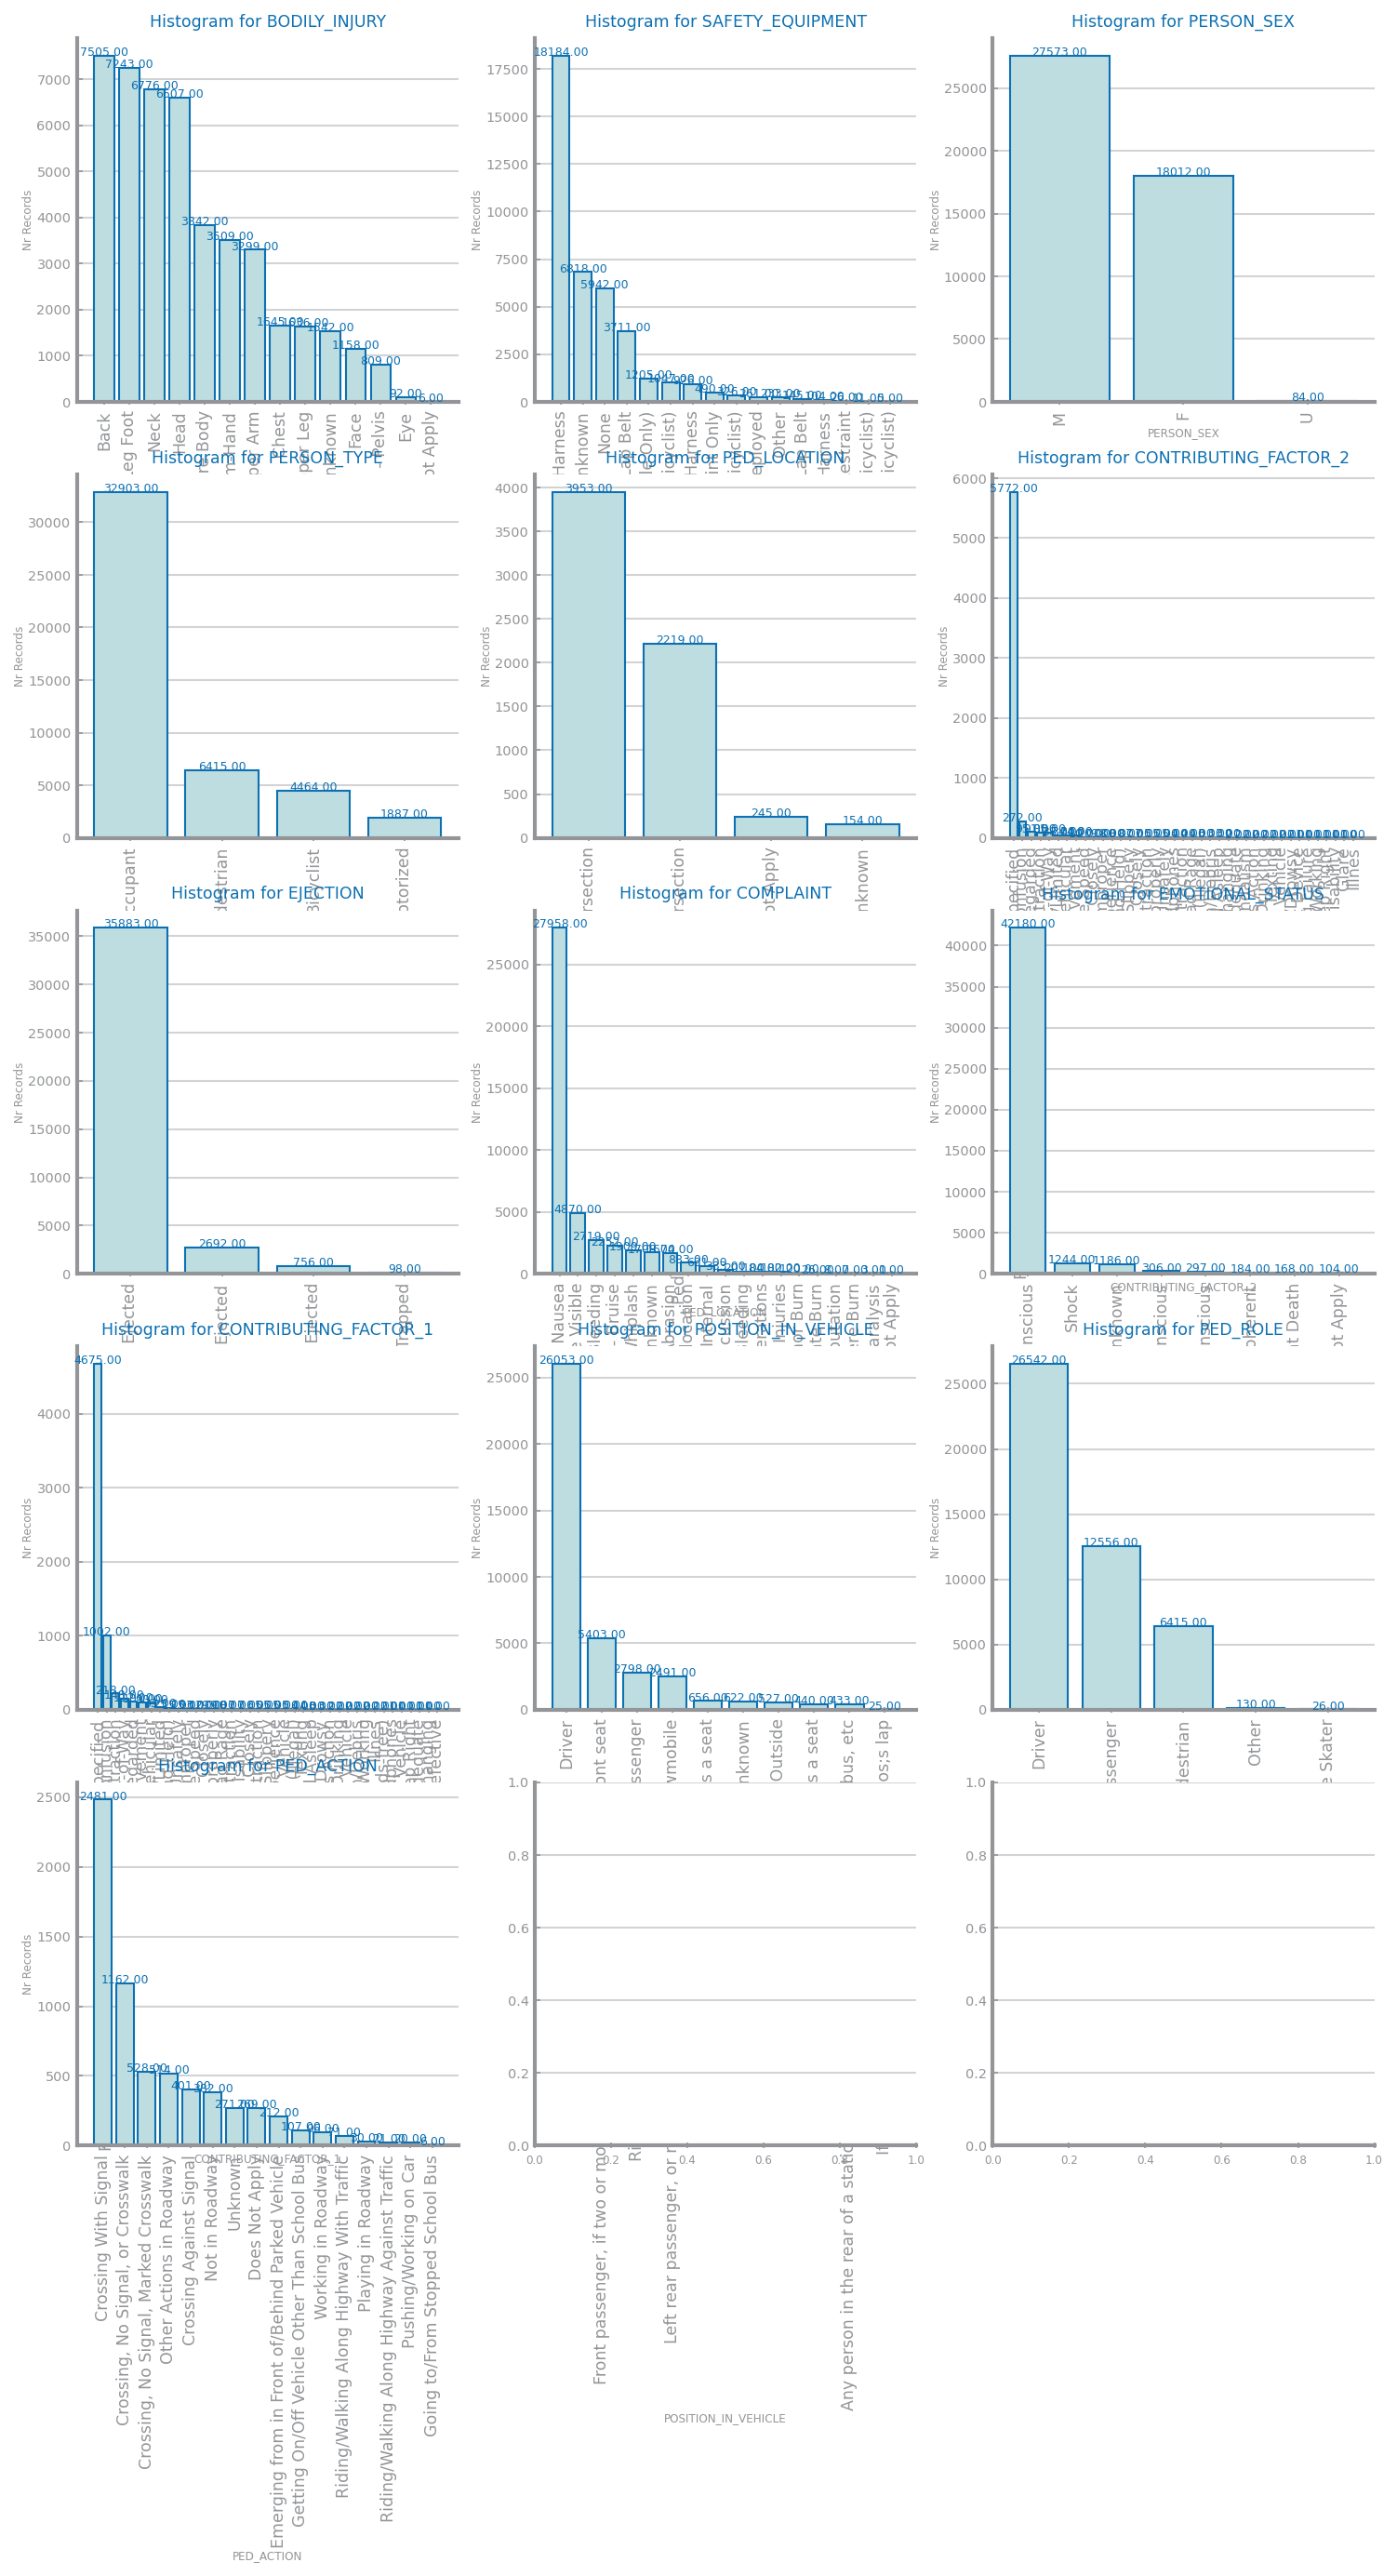

In [24]:
symbolic_vars = get_variable_types(df)['Symbolic']
if not symbolic_vars:
    raise ValueError('There are no symbolic variables.')

rows, cols = choose_grid(len(symbolic_vars))
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False, constrained_layout=False)

i, j = 0, 0
for n in range(len(symbolic_vars)):
    counts = df[symbolic_vars[n]].value_counts()
    bar_chart(counts.index.to_list(), counts.values, ax=axs[i, j], title='Histogram for %s'%symbolic_vars[n], xlabel=symbolic_vars[n], ylabel='Nr Records', percentage=False, rotation=True)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

savefig(DISTRIBUTION_FOLDER + "/symbolic_distribution_histrogram.png")

show() 

### Date variables

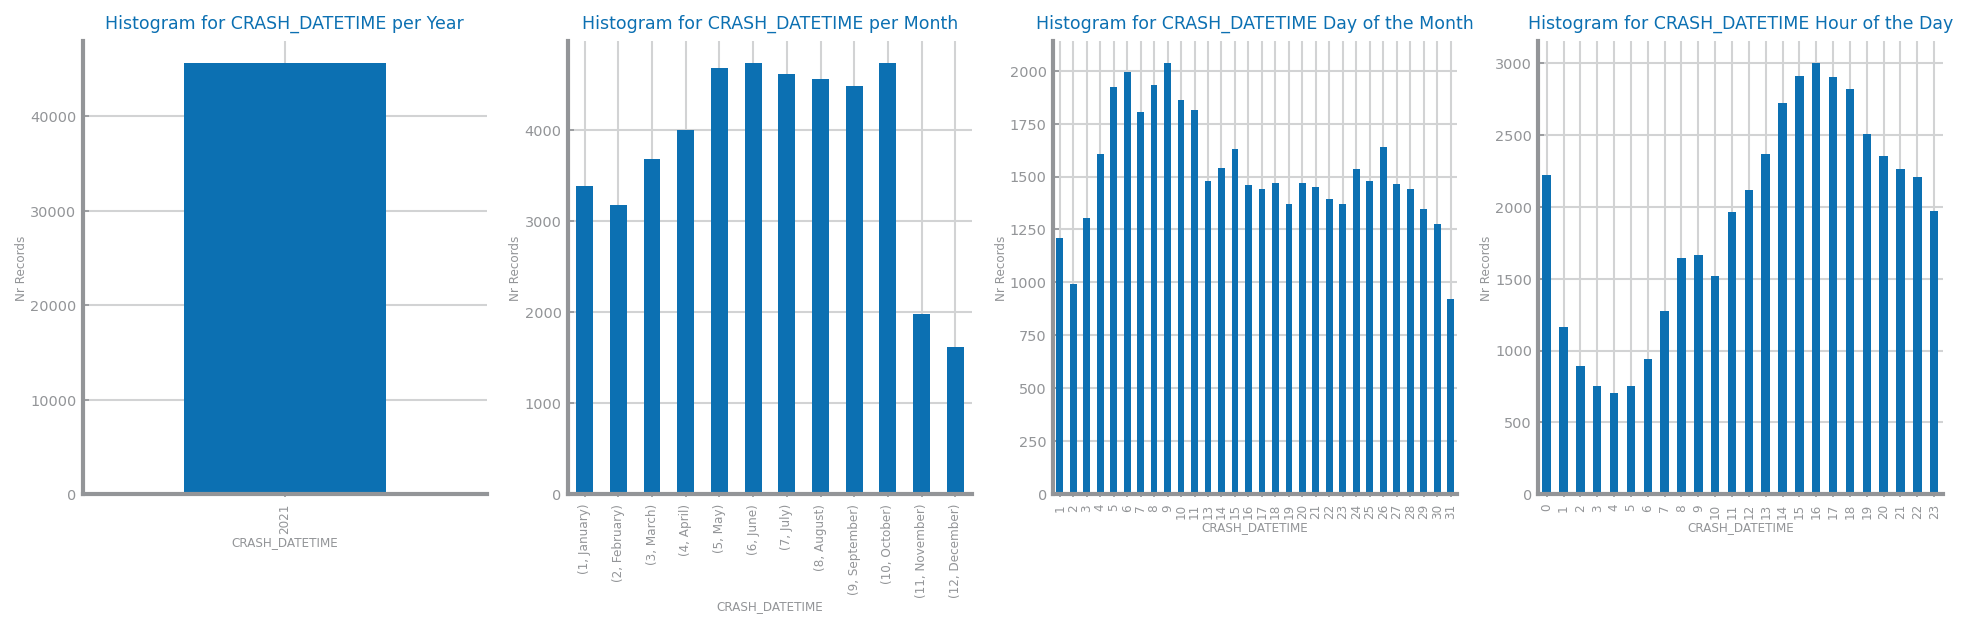

In [25]:
date_vars = get_variable_types(df)['Date']
if not date_vars:
    raise ValueError('There are no date variables.')

rows, cols = len(date_vars), 4
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False, constrained_layout=False)

for i, var in enumerate(date_vars):
    df[var].groupby(df[var].dt.year).count().plot(ax=axs[0, 0], kind="bar", title='Histogram for %s per Year'%date_vars[i],  xlabel=date_vars[i], ylabel='Nr Records')
    df[var].groupby([df[var].dt.month, df[var].dt.month_name()]).count().plot(ax=axs[0, 1], kind="bar", title='Histogram for %s per Month'%date_vars[i],  xlabel=date_vars[i], ylabel='Nr Records')
    df[var].groupby(df[var].dt.day).count().plot(ax=axs[0, 2], kind="bar", title='Histogram for %s Day of the Month'%date_vars[i],  xlabel=date_vars[i], ylabel='Nr Records')
    df[var].groupby(df[var].dt.hour).count().plot(ax=axs[0, 3], kind="bar", title='Histogram for %s Hour of the Day'%date_vars[i],  xlabel=date_vars[i], ylabel='Nr Records')
    
savefig(DISTRIBUTION_FOLDER + "/date_distribution_histrogram.png")

show()

## **Data Granularity**

### Numeric features

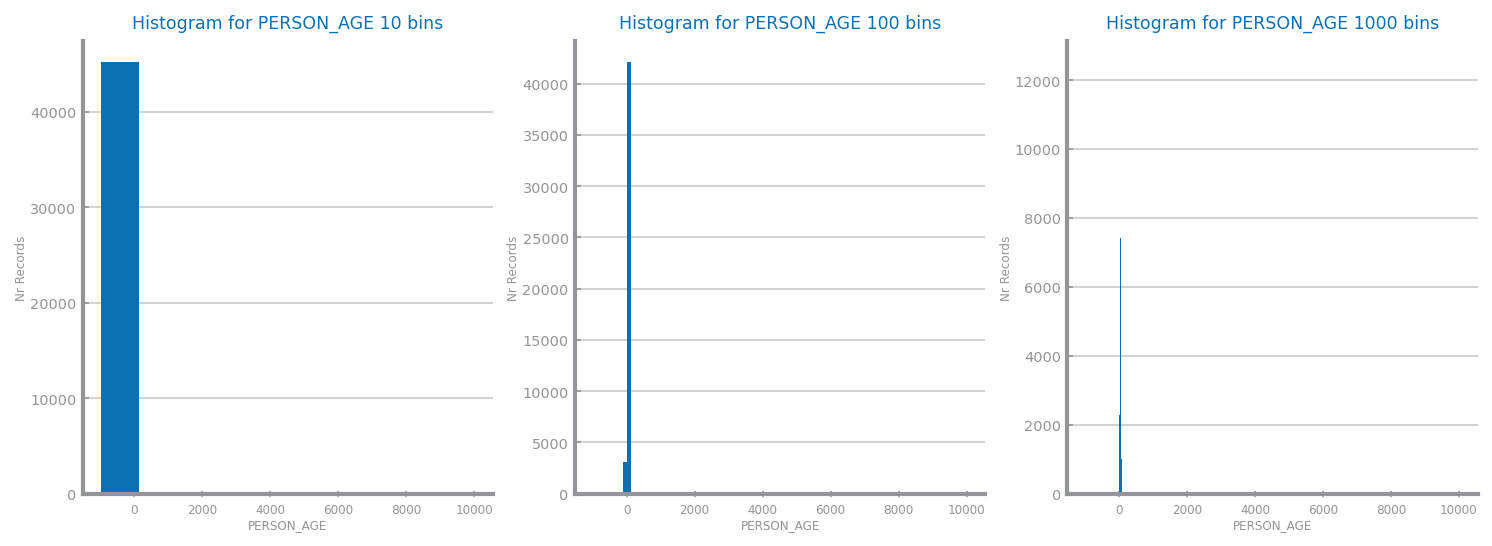

In [26]:
variables = get_variable_types(df)['Numeric']
if not variables:
    raise ValueError('There are no numeric variables.')
rows = len(variables)
bins = (10, 100, 1000)
cols = len(bins)
fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)
for i in range(rows):
    for j in range(cols):
        axs[i, j].set_title('Histogram for %s %d bins' % (variables[i], bins[j]))
        axs[i, j].set_xlabel(variables[i])
        axs[i, j].set_ylabel('Nr Records')
        axs[i, j].hist(df[variables[i]].values, bins=bins[j])

savefig(GRANULARITY_FOLDER + "/numeric_granularity_histogram.png")

show()

### Symbolic features

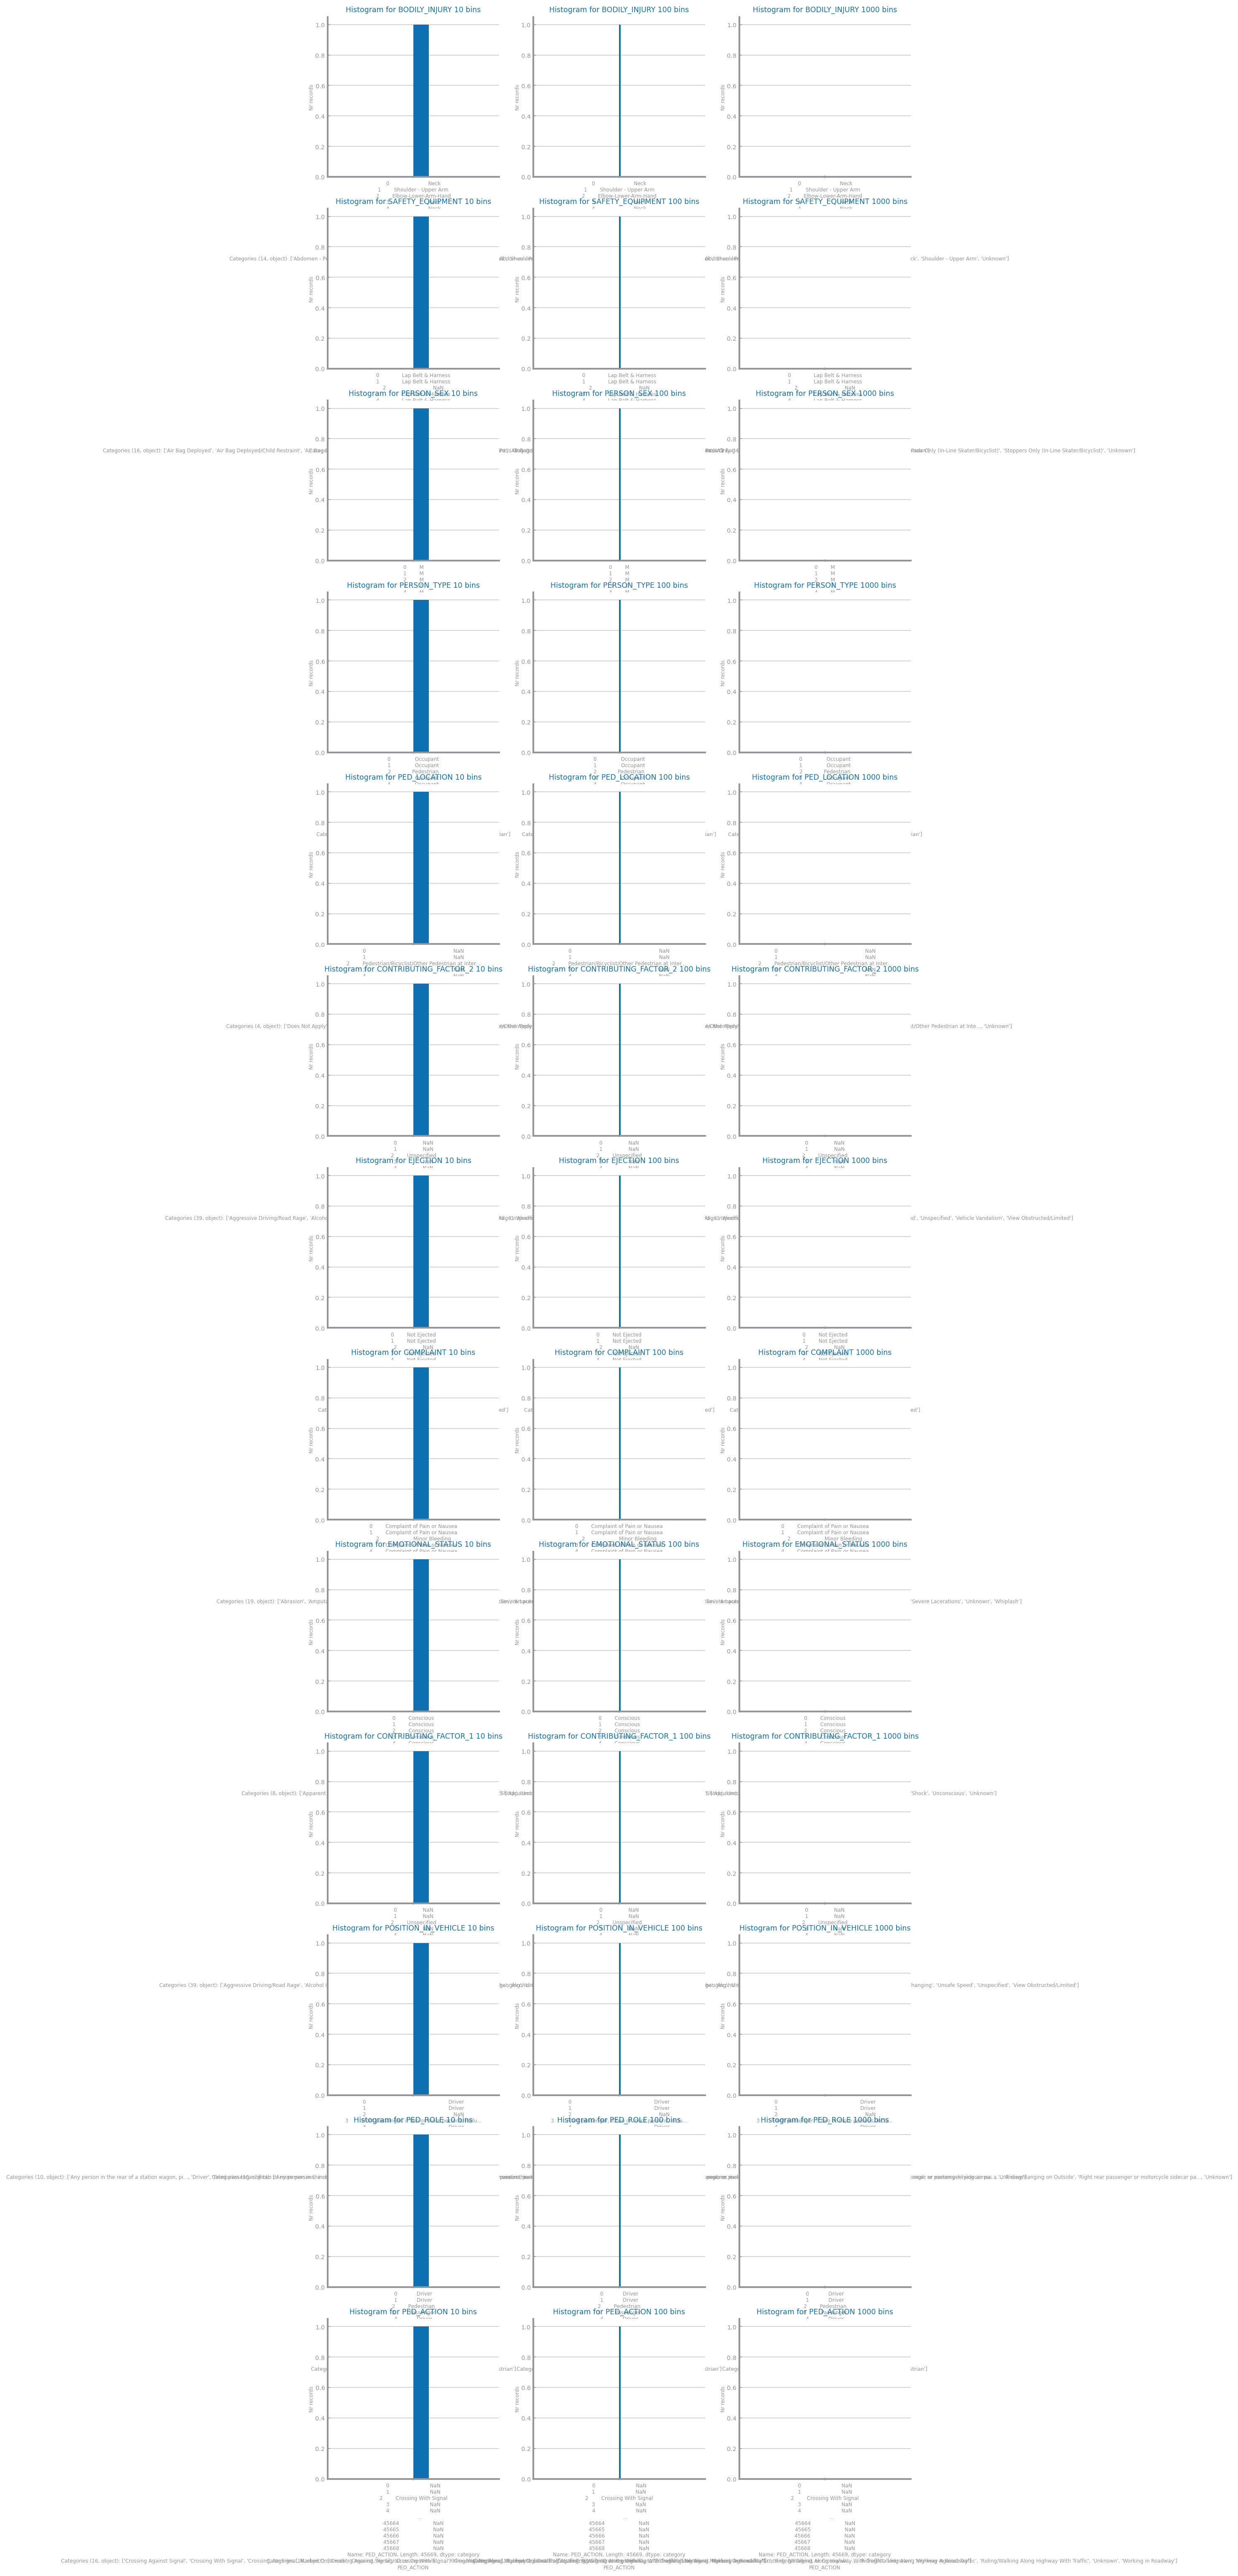

In [27]:
variables = get_variable_types(df)['Symbolic']

if not variables:
	raise ValueError('There are no symbolic variables.')
rows = len(variables)
bins = (10, 100, 1000)
cols = len(bins)
fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)

for i in range(rows):
    for j in range(cols):
        axs[i, j].set_title('Histogram for %s %d bins' % (variables[i], bins[j]))
        axs[i, j].set_xlabel(variables[i])
        axs[i, j].set_ylabel('Nr records')
        axs[i, j].hist(str(df[variables[i]]), bins=bins[j])

savefig(GRANULARITY_FOLDER + "/symbolic_granularity_histogram.png")

show()

### Date features

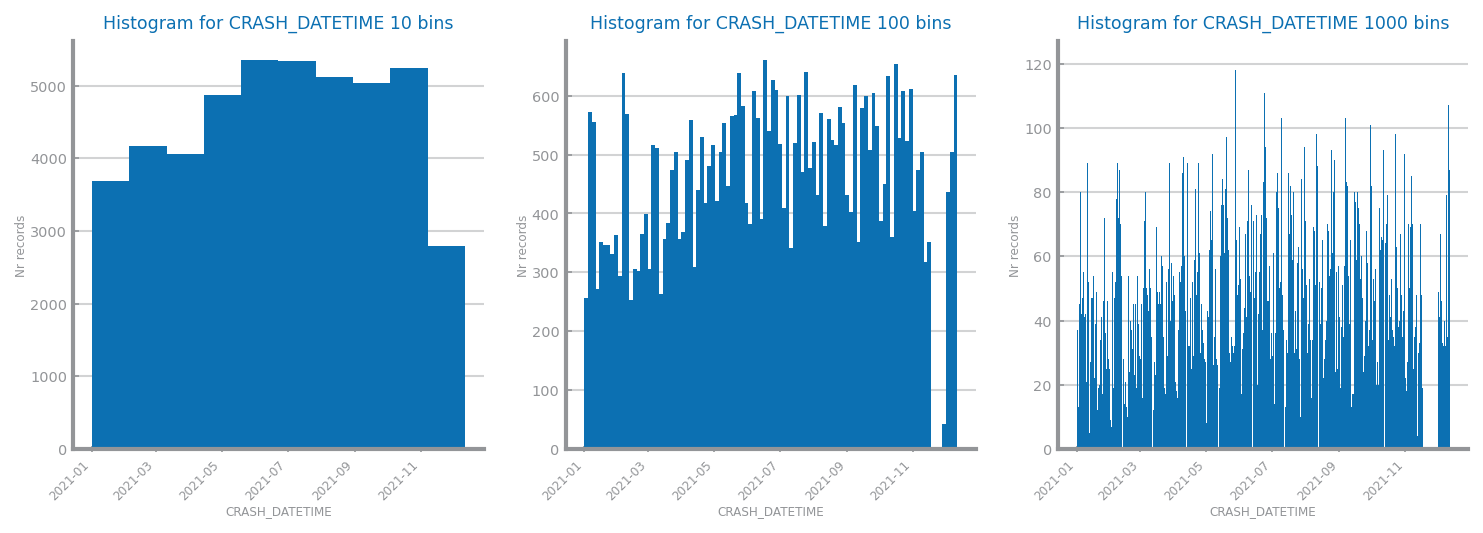

In [28]:
variables = get_variable_types(df)['Date']
if not variables:
    raise ValueError('There are no date variables.')
rows = len(variables)
bins = (10, 100, 1000)
cols = len(bins)
fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False, constrained_layout=True)

fig.autofmt_xdate(rotation=45)

for i in range(rows):
    for j in range(cols):
        axs[i, j].set_title('Histogram for %s %d bins' % (variables[i], bins[j]))
        axs[i, j].set_xlabel(variables[i])
        axs[i, j].set_ylabel('Nr records')
        axs[i, j].hist(df[variables[i]].values, bins=bins[j])
        
savefig(GRANULARITY_FOLDER + "/date_granularity_histogram.png")

show()

## **Data Sparcity**

### Scatter-plots vs class for numeric values

1 1


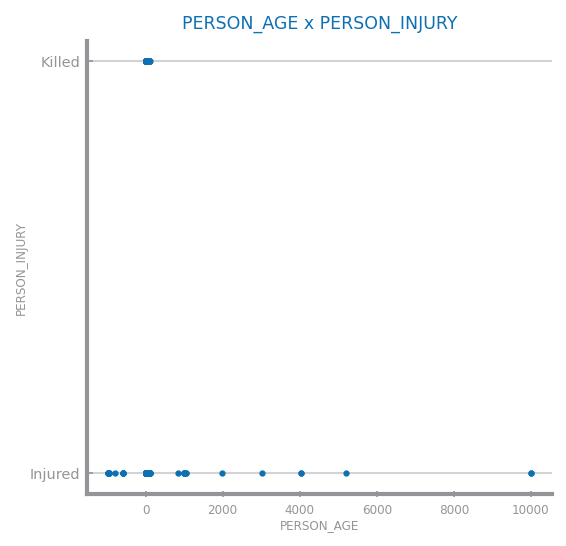

In [29]:
# numeric_vars = get_variable_types(df)['Numeric']

numeric_vars = ["PERSON_AGE", "PERSON_INJURY"]

if not numeric_vars:
    raise ValueError('There are no numeric variables.')
rows, cols = len(numeric_vars)-1, len(numeric_vars)-1
print(rows, cols)
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
for i in range(len(numeric_vars)):
    var1 = numeric_vars[i]
    for j in range(i+1, len(numeric_vars)):
        var2 = numeric_vars[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(df[var1], df[var2])

savefig(SPARCITY_FOLDER + "/numeric_sparcity_vs_target_values.png")

show()

### Scatter-plots for symbolic values

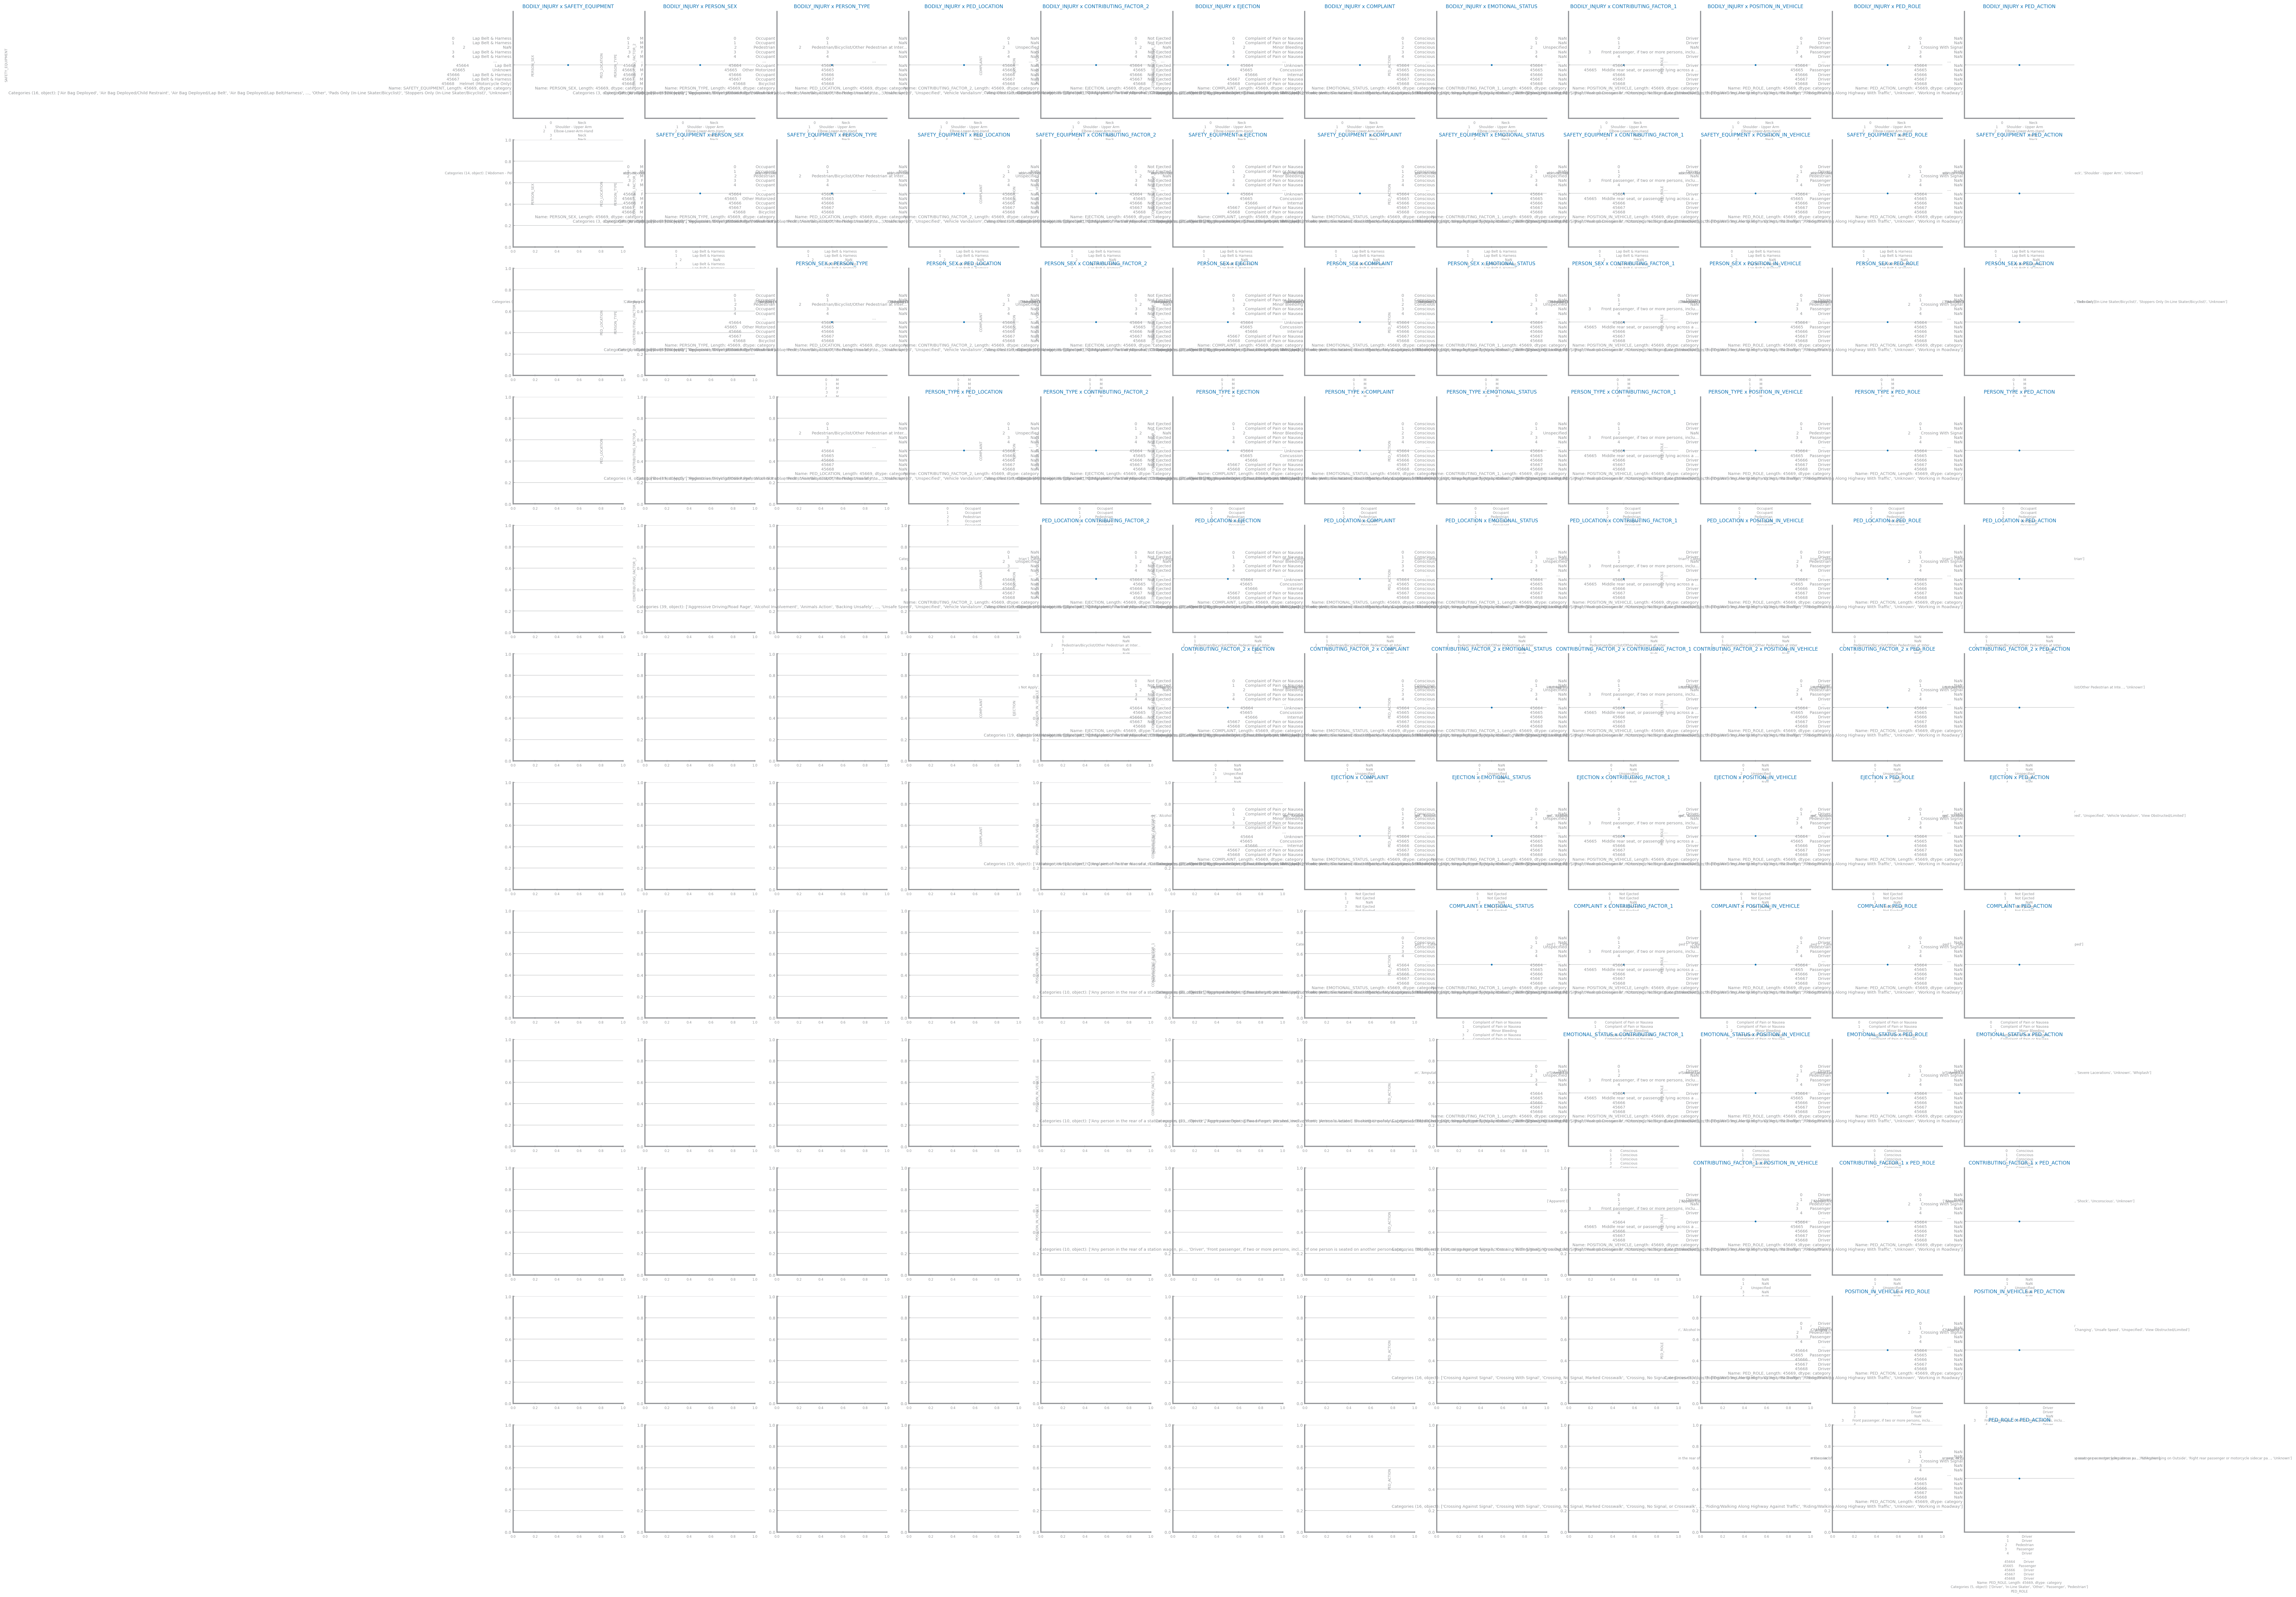

In [30]:
symbolic_vars = get_variable_types(df)['Symbolic']
if not symbolic_vars:
    raise ValueError('There are no symbolic variables.')
rows, cols = len(symbolic_vars)-1, len(symbolic_vars)-1
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
for i in range(len(symbolic_vars)):
    var1 = symbolic_vars[i]
    for j in range(i+1, len(symbolic_vars)):
        var2 = symbolic_vars[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(str(df[var1]), str(df[var2]))

savefig(SPARCITY_FOLDER + "/symbolic_sparcity_values.png")

show()

### Scatterplots vs class for symbolic values

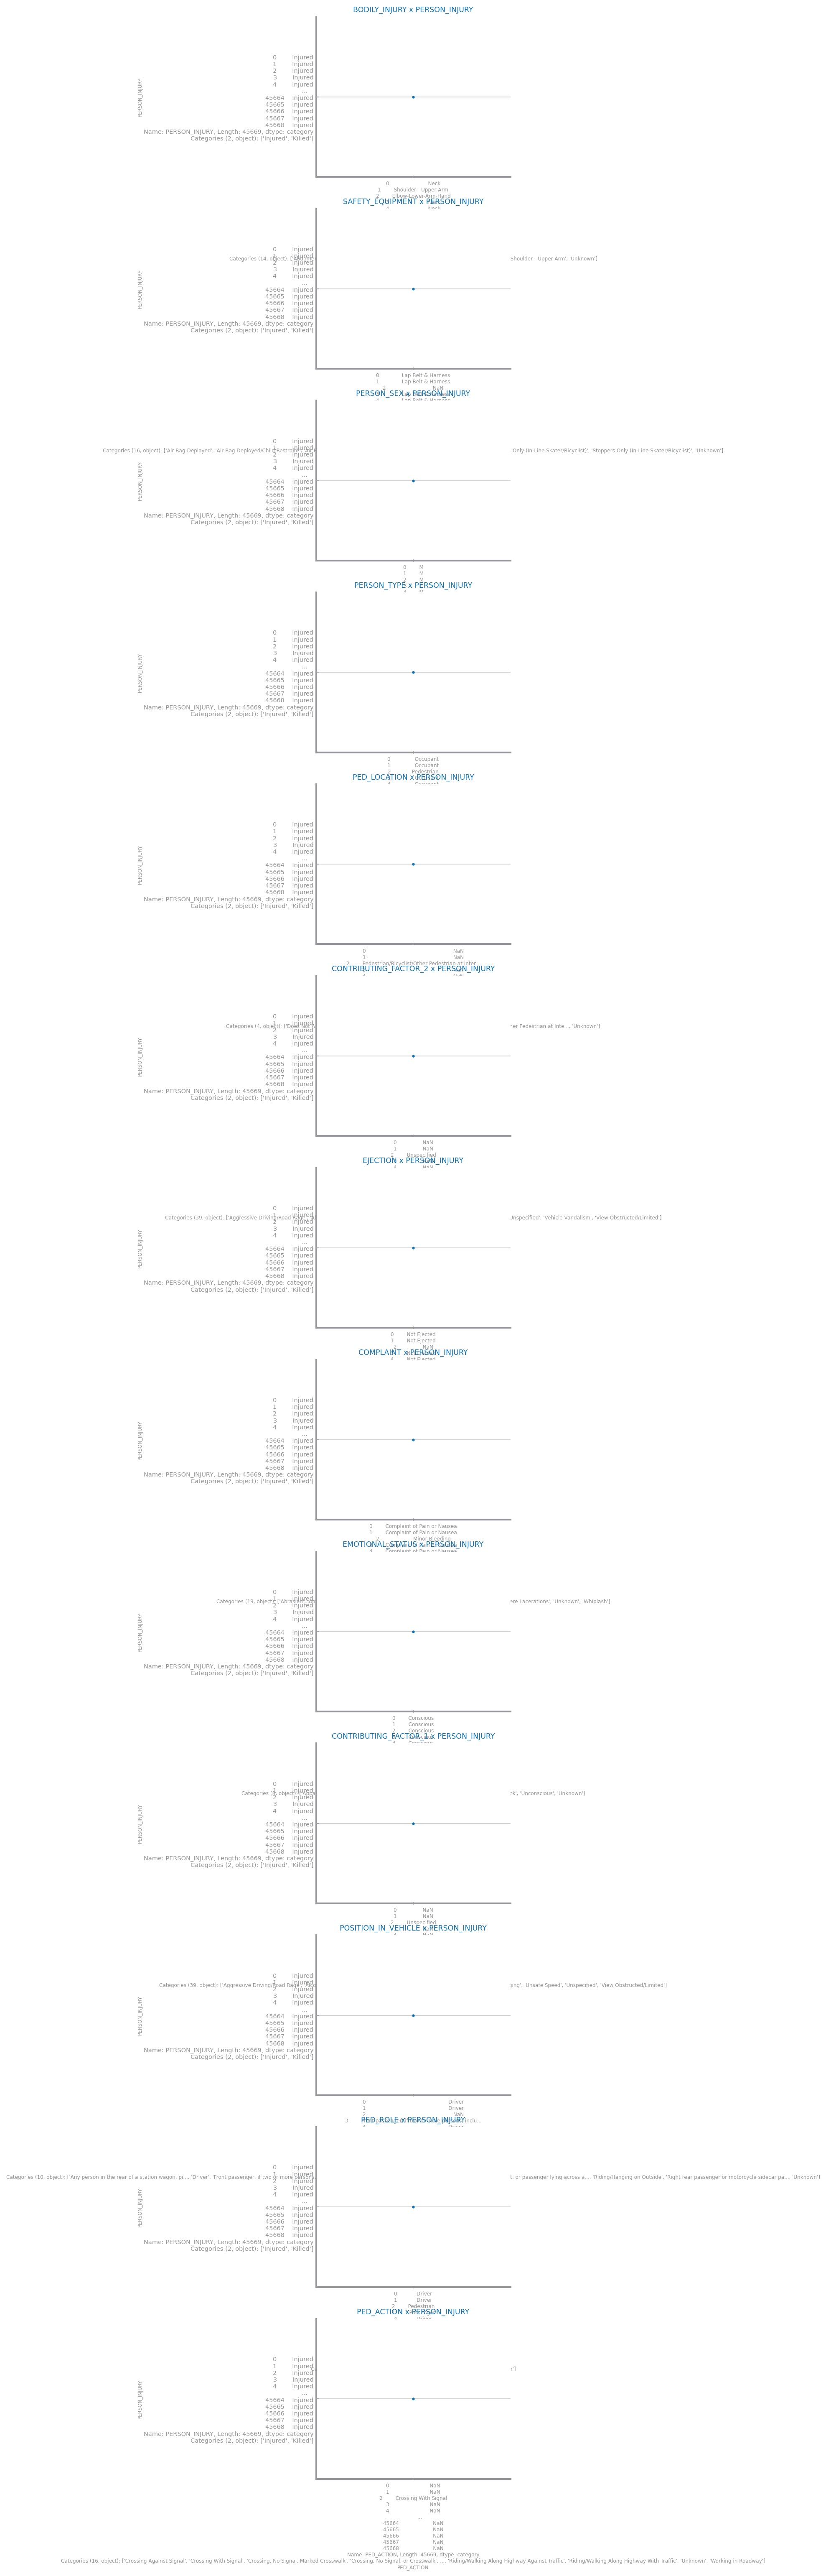

In [31]:
target_class = get_variable_types(df)['Binary']

symbolic_vars = get_variable_types(df)['Symbolic']
if not symbolic_vars:
    raise ValueError('There are no symbolic variables.')
rows, cols = len(symbolic_vars), len(target_class)
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
for i in range(rows):
    for j in range(cols):
        var1 = symbolic_vars[i]
        var2 = target_class[j]
        axs[i, j].set_title("%s x %s"%(var1,var2))
        axs[i, j].set_xlabel(var1)
        axs[i, j].set_ylabel(var2)
    axs[i, 0].scatter(str(df[var1]), str(df[var2]))

savefig(SPARCITY_FOLDER + "/symbolic_sparcity_vs_target_values.png")

show()

### Correlation analysis for numeric variables

In [34]:
symbolic_and_target_vars = get_variable_types(df)['Symbolic'] + get_variable_types(df)['Binary']
if not symbolic_and_target_vars:
    raise ValueError('There are no symbolic variables.')

# Transform categorical data into numerical
label_encoder = LabelEncoder()
for var in symbolic_and_target_vars:
    df[var + "_NUMERIC"] = label_encoder.fit_transform(df[var])

corr_mtx = abs(df.corr())
df

CRASH_DATETIME  PERSON_AGE         BODILY_INJURY  \
0     2021-01-01 00:00:00        37.0                  Neck   
1     2021-01-01 00:00:00        22.0  Shoulder - Upper Arm   
2     2021-01-01 00:00:00        43.0  Elbow-Lower-Arm-Hand   
3     2021-01-01 00:00:00        68.0                  Neck   
4     2021-01-01 00:00:00        22.0                  Neck   
...                   ...         ...                   ...   
45664 2021-11-16 21:00:00        28.0   Knee-Lower Leg Foot   
45665 2021-11-16 22:00:00        25.0                  Head   
45666 2021-11-16 22:00:00        30.0   Knee-Lower Leg Foot   
45667 2021-11-16 22:00:00        62.0                  Neck   
45668 2021-11-16 22:00:00        18.0         Hip-Upper Leg   

               SAFETY_EQUIPMENT PERSON_SEX      PERSON_TYPE  \
0            Lap Belt & Harness          M         Occupant   
1            Lap Belt & Harness          M         Occupant   
2                           NaN          M       Pedestrian   
3            Lap Belt & Harness          F         Occupant   
4            Lap Belt & Harness          M         Occupant   
...                         ...        ...              ...   
45664                  Lap Belt          F         Occupant   
45665                   Unknown          M  Other Motorized   
45666        Lap Belt & Harness          F         Occupant   
45667        Lap Belt & Harness          M         Occupant   
45668  Helmet (Motorcycle Only)          M        Bicyclist   

                                            PED_LOCATION  \
0                                                    NaN   
1                                                    NaN   
2      Pedestrian/Bicyclist/Other Pedestrian at Inter...   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
45664                                                NaN   
45665                                                NaN   
45666                                                NaN   
45667                                                NaN   
45668                                                NaN   

      CONTRIBUTING_FACTOR_2     EJECTION                    COMPLAINT  ...  \
0                       NaN  Not Ejected  Complaint of Pain or Nausea  ...   
1                       NaN  Not Ejected  Complaint of Pain or Nausea  ...   
2               Unspecified          NaN               Minor Bleeding  ...   
3                       NaN  Not Ejected  Complaint of Pain or Nausea  ...   
4                       NaN  Not Ejected  Complaint of Pain or Nausea  ...   
...                     ...          ...                          ...  ...   
45664                   NaN  Not Ejected                      Unknown  ...   
45665                   NaN      Ejected                   Concussion  ...   
45666                   NaN  Not Ejected                     Internal  ...   
45667                   NaN  Not Ejected  Complaint of Pain or Nausea  ...   
45668                   NaN      Ejected  Complaint of Pain or Nausea  ...   

      PED_LOCATION_NUMERIC CONTRIBUTING_FACTOR_2_NUMERIC EJECTION_NUMERIC  \
0                        4                            39                1   
1                        4                            39                1   
2                        2                            36                4   
3                        4                            39                1   
4                        4                            39                1   
...                    ...                           ...              ...   
45664                    4                            39                1   
45665                    4                            39                0   
45666                    4                            39                1   
45667                    4                            39             

### Correlation plot between numeric variables and target class

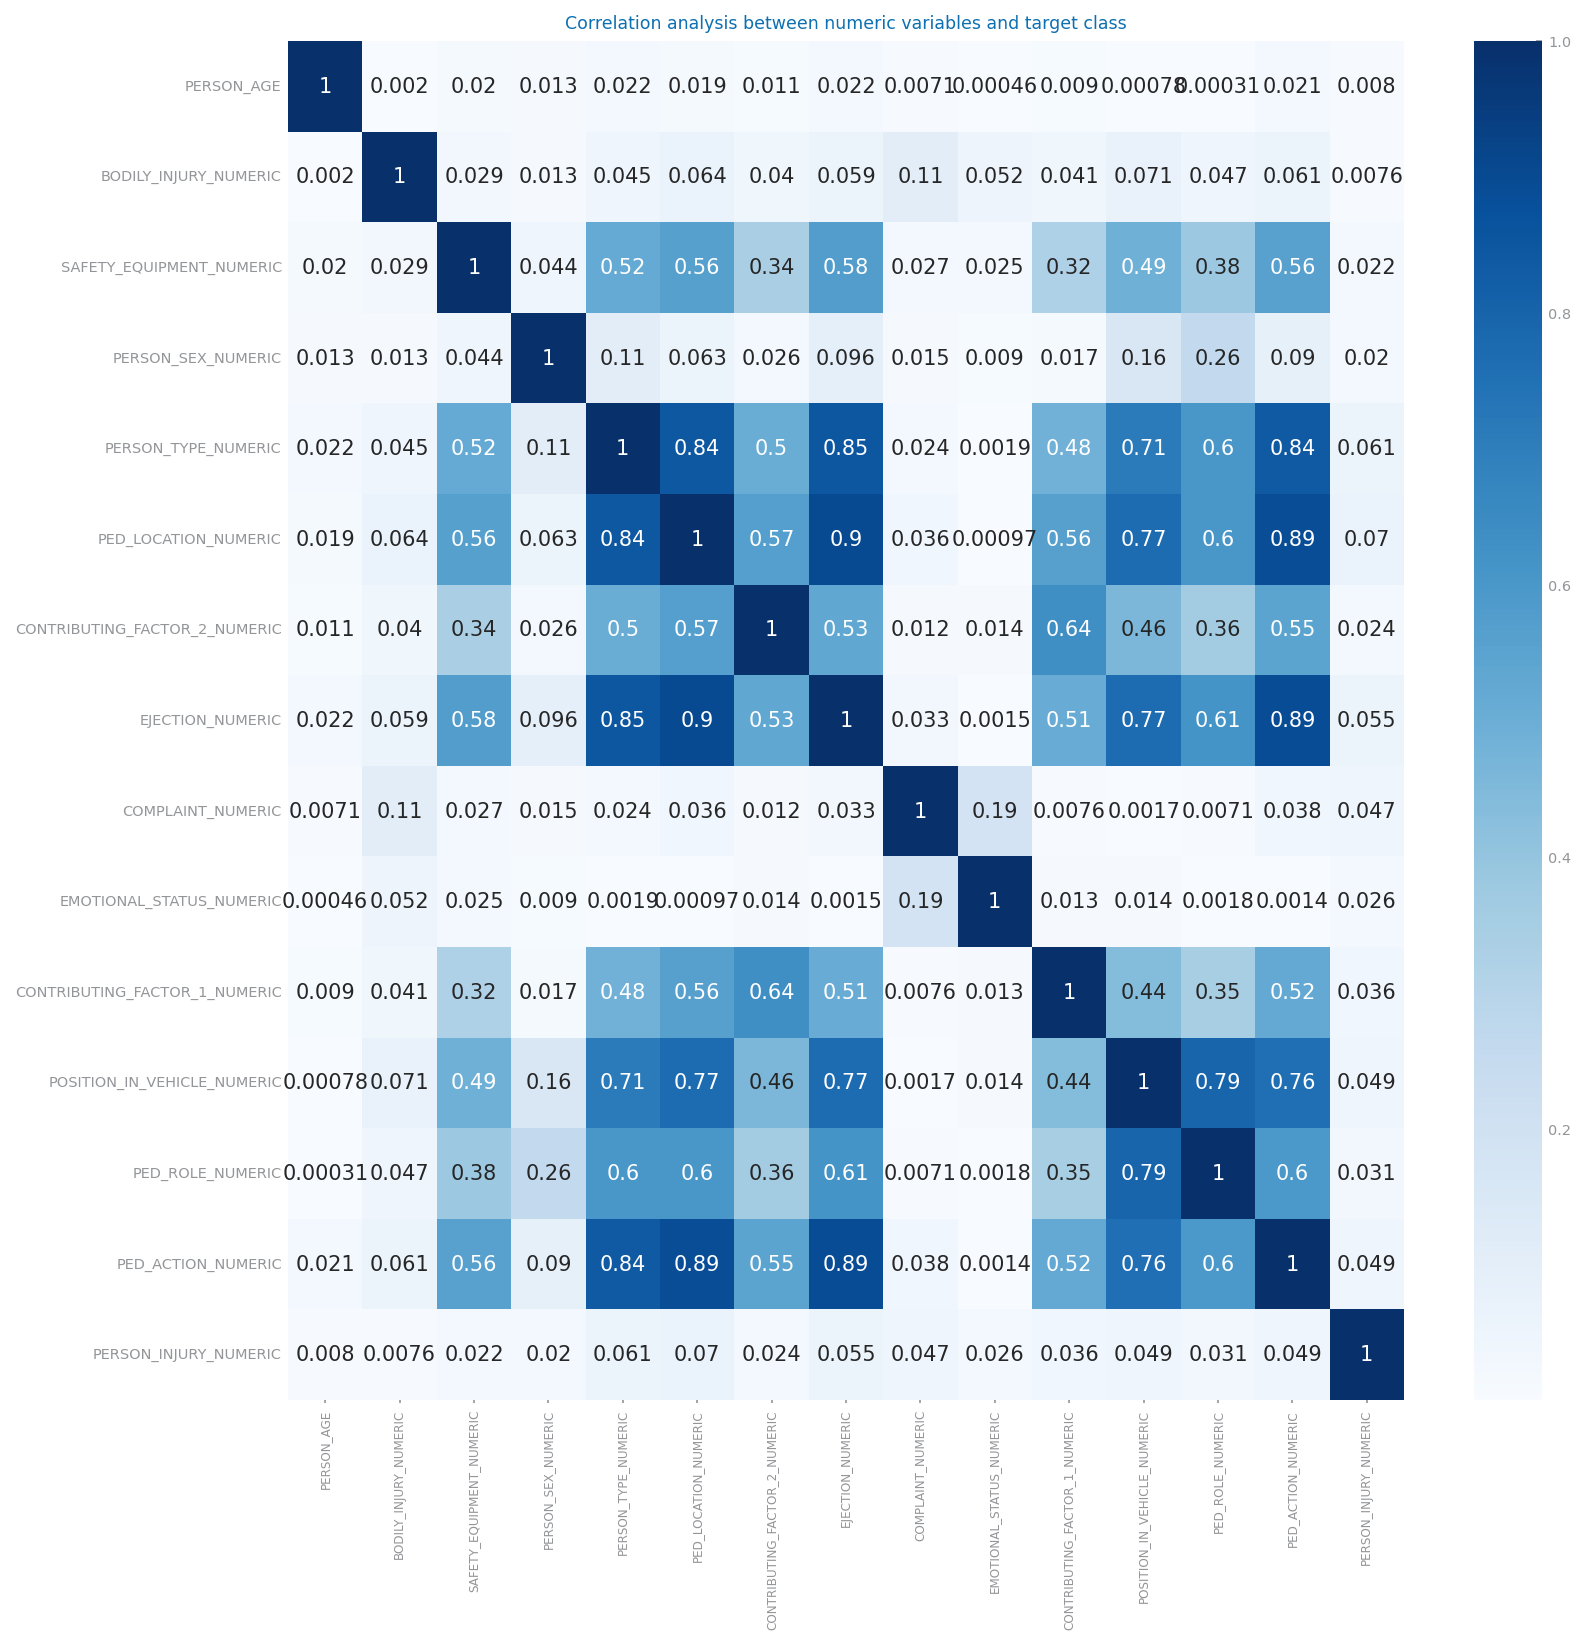

In [35]:
fig = figure(figsize=[12, 12])
heatmap(abs(corr_mtx), xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
title('Correlation analysis between numeric variables and target class')

savefig(SPARCITY_FOLDER + "/correlation_analysis_target.png")

show()